In [4]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
nltk.download('punkt')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df = pd.read_excel("data (8)/Canva_reviews.xlsx")

In [6]:
df.head()

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files
3,gp:AOqpTOHSuKkVTcM3QgCCKysHQlxEnk2ocOKsUMiMIJy...,Anthony Dean,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's a brilliant app, but I have just one prob...",5,145,2.116.0,2021-06-19 23:36:07,NaN,NaT,Negative,others,bug_app_crash
4,gp:AOqpTOEOrZt5H6jXPiplJyffCd5ZBnVXACTWgwNsF1R...,Neha Diana Wesley,https://play-lh.googleusercontent.com/a-/AOh14...,This was such a great app. I used to make BTS ...,4,142,2.116.0,2021-06-21 00:29:27,Hi Neha. Sorry to hear that you are unable to ...,2021-06-24 20:46:28,Negative,others,bug_other


In [7]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'review', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'Sentiment',
       'Sub Category', 'Sub Category_test'],
      dtype='object')

In [8]:
df = df[['review','score','Sentiment']]
df.head()

,review,score,Sentiment
0,Overall it's really an amazing app. I've been ...,4,Negative
1,Hey! Yes I gave a 5 star rating... coz I belie...,5,Positive
2,Canva used to be a good app! But recently I've...,1,Negative
3,"It's a brilliant app, but I have just one prob...",5,Negative
4,This was such a great app. I used to make BTS ...,4,Negative


<AxesSubplot: xlabel='score', ylabel='count'>

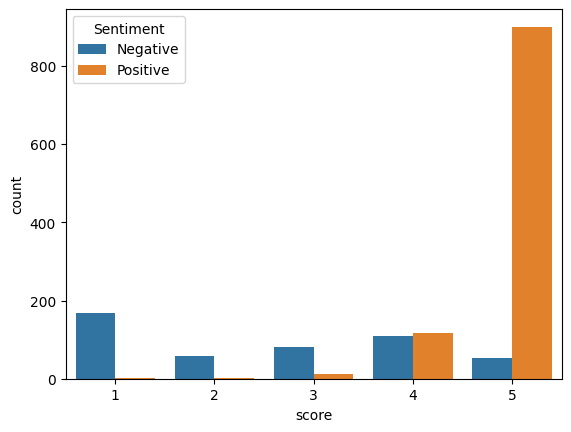

In [9]:
sns.countplot(data=df,x='score',hue='Sentiment')

<AxesSubplot: xlabel='Sentiment', ylabel='count'>

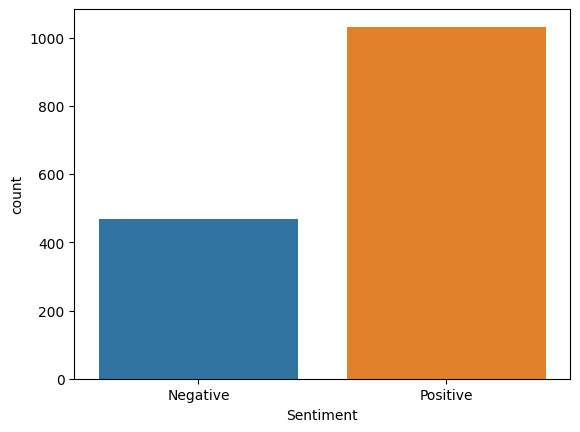

In [11]:
sns.countplot(data=df,x='Sentiment')

In [25]:
nltk.sent_tokenize(df['review'].iloc[0,])

["Overall it's really an amazing app.",
 "I've been using this for the past 5 years however I only have one issue though and I wanted this to get address since I think this issue had lasted for how many years?",
 "The texts were blurred and when you zoom it out it's pixelated.",
 'I thought this issue only occurs on mobile apps however it was also present on the website.',
 'Please fix this.',
 'I still remember the time when I can export high definition texts and I love that experience.',
 'Thank you!']

In [29]:
df['review'].iloc[0]

"Overall it's really an amazing app. I've been using this for the past 5 years however I only have one issue though and I wanted this to get address since I think this issue had lasted for how many years? The texts were blurred and when you zoom it out it's pixelated. I thought this issue only occurs on mobile apps however it was also present on the website. Please fix this. I still remember the time when I can export high definition texts and I love that experience. Thank you!"

In [36]:
sentences = list(df['review'])

In [37]:
corpus = []

for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]',' ', sentences[i])
    review = review.lower()

    review  = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english')) and len(word)>2]
    review = ' '.join(review)
    corpus.append(review)

cv= CountVectorizer(binary=True, ngram_range=(2,3),max_features=20)
X = cv.fit_transform(corpus)

In [38]:
cv.vocabulary_

{'amazing app': 0,
 'please fix': 16,
 'good app': 9,
 'great app': 11,
 'using app': 19,
 'love app': 13,
 'like app': 12,
 'editing app': 8,
 'user friendly': 18,
 'easy use': 7,
 'really good': 17,
 'app ever': 3,
 'nice app': 14,
 'app use': 4,
 'awesome app': 5,
 'one best': 15,
 'best app': 6,
 'app easy': 1,
 'app easy use': 2,
 'graphic design': 10}

In [39]:
X[0].toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],
      dtype=int64)

In [40]:
corpus[0]

'overall really amazing app using past year however one issue though wanted get address since think issue lasted many year text blurred zoom pixelated thought issue occurs mobile apps however also present website please fix still remember time export high definition text love experience thank'

In [41]:
df["Sentiment"] = df["Sentiment"].apply(lambda x: 1 if x=="Positive" else 0)

In [43]:
y = df["Sentiment"]

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.6983333333333334
Test Accuracy:0.71


In [49]:
print(f"Precision:{precision_score(y_test, test_pred)}")

Test Accuracy:0.7030716723549488


In [50]:
print(f"Recall:{recall_score(y_test, test_pred)}")

Recall:1.0


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
cv = TfidfVectorizer(max_features=20, ngram_range=(2, 3))
X = cv.fit_transform(corpus)

In [60]:
cv.vocabulary_

{'amazing app': 0,
 'please fix': 15,
 'good app': 8,
 'great app': 10,
 'use app': 17,
 'using app': 19,
 'love app': 12,
 'like app': 11,
 'editing app': 7,
 'user friendly': 18,
 'easy use': 6,
 'really good': 16,
 'app ever': 3,
 'nice app': 13,
 'awesome app': 4,
 'one best': 14,
 'best app': 5,
 'app easy': 1,
 'app easy use': 2,
 'graphic design': 9}

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [63]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f"Train Accuracy:{accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy:{accuracy_score(y_test, test_pred)}")

Train Accuracy:0.6983333333333334
Test Accuracy:0.71


In [64]:
print(f"Precision:{precision_score(y_test, test_pred)}")

Precision:0.7030716723549488


In [65]:
print(f"Recall:{recall_score(y_test, test_pred)}")

Recall:1.0
